First GPUTain

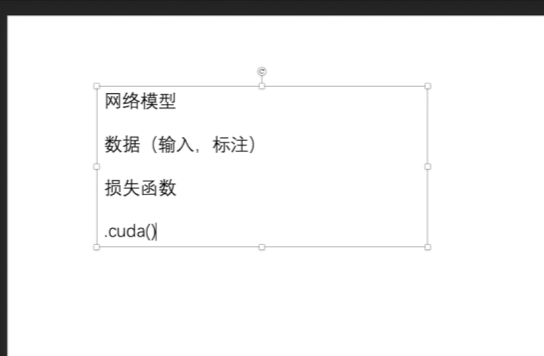

In [1]:
import torchvision
from torch import nn
import torch

from torch.utils.tensorboard import SummaryWriter
from torch.utils.data import DataLoader

#准备训练集
train_data = torchvision.datasets.CIFAR10(root="data", train=True, transform=torchvision.transforms.ToTensor(),download=True)

test_data = torchvision.datasets.CIFAR10(root="data", train=False, transform=torchvision.transforms.ToTensor(),download=True)


#length 长度
train_data_size = len(train_data)
test_data_size = len(test_data)


# 如果tran_data_size=0,训练集的长度为0
print("训练集长度为：{}".format(train_data_size))
print("测试集长度为：{}".format(test_data_size))

# Dataloader 加载数据集
train_dataloader = DataLoader(train_data, batch_size=64)
test_dataloader = DataLoader(test_data, batch_size=64)


#搭建神经网络
class Tudui(nn.Module):
    def __init__(self):
        super(Tudui, self).__init__()
        self.model = nn.Sequential(
           nn.Conv2d(3, 32, 5, 1, 2),#卷积
           nn.MaxPool2d(2), #最大池化
           nn.Conv2d(32, 32, 5, 1, 2),
           nn.MaxPool2d(2),
           nn.Conv2d(32, 64, 5, 1, 2),
           nn.MaxPool2d(2),
           nn.Flatten(), #进行展平
           nn.Linear(64*10*10, 64),
           nn.Linear(64, 10)

        )
    def forward(self, x):
        x = self.model(x)
        return x
#创建网络模型
# tudui = Tudui()
class Tudui(nn.Module):
    def __init__(self):
        super(Tudui, self).__init__()
        self.model1 = nn.Sequential( 
          nn.Conv2d(3, 32, 5, padding=2),
          nn.MaxPool2d(2),
         nn.Conv2d(32, 32, 5, padding=2),
         nn.MaxPool2d(2),
         nn.Conv2d(32, 64, 5, padding=2),
         nn.MaxPool2d(2),
         nn.Flatten(),
         nn.Linear(1024, 64),
         nn.Linear(64, 10),
        )
    def forward(self, x):
        x = self.model1(x)
        return x

# loss = nn.CrossEntropyLoss() #交叉商
tudui = Tudui()
if torch.cuda.is_available():

    tudui = tudui.cuda()
#损失函数
loss_fn = nn.CrossEntropyLoss()
if torch.cuda.is_available():
    loss_fn = loss_fn.cuda()

#优化器

learning_rate = 10e-2
optimizer = torch.optim.SGD(tudui.parameters(), lr=learning_rate)

#设置训练网络的一些参数
#记录训练和测试次数
total_train_step = 0
total_test_step = 0

#测试轮数
epoch = 10

#添加tensorboard使数据可视化
writer = SummaryWriter("logs_train")
for i in range(epoch):
    print("第几轮训练；{}".format(total_train_step))

    #训练步骤开始
    for data in train_dataloader:
        imgs, targets = data
        if torch.cuda.is_available():

            imgs = imgs.cuda()
            targets = targets.cuda()
        outputs = tudui(imgs)
        loss = loss_fn(outputs, targets)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_train_step += 1
        #设置打印出的数值大小范围减少打印次数
        if total_train_step % 100 == 0:
            print("训练次数:{},损失值loss：{}".format(total_train_step, loss.item()))
            writer.add_scalar("train_loss", loss.item(),total_train_step)
    # 测试步骤开始
    total_test_less = 0
    total_accuracy = 0
    with torch.no_grad():
        for data in test_dataloader:
            imgs, tagets = data
            if torch.cuda.is_available():
                imgs = imgs.cuda()
                targets = targets.cuda()
            outputs = tudui(imgs)
            loss = loss_fn(outputs, targets)
            total_test_loss += loss.item()
            accuracy = (outputs.argmax(1) == targets).sum()
            total_accuracy += accuracy
    print("整体测试集上的Loss：{}".format(total_test_loss)) 
    print("整体测试集上的正确率：{}".format(total_accuracy/test_data_size))
    writer.add_scalar("test_loss", total_test_loss, total_test_step)
    writer.add_scalar("test_accuracy", total_accuracy/test_data_size, total_test_step)
    total_test_step  += 1

    torch.save(tudui, "tudui_{}.pth".format(i))
    print("模型已保存")
 

writer.close()




IndentationError: expected an indented block after 'if' statement on line 74 (35986672.py, line 78)

Second_GPUTrain

In [ ]:
import torchvision
from torch import nn
import torch
import torchvision
from torch.utils.tensorboard import SummaryWriter
from torch.utils.data import DataLoader
import time

#准备训练集

#定义训练的设备
# device = torcj.device("cpu")
# 经过运行时间可知很显然cuda训练要明显快于cpu
device = torch.device("cuda")
train_data = torchvision.datasets.CIFAR10(root="data", train=True, transform=torchvision.transforms.ToTensor(),download=True)

test_data = torchvision.datasets.CIFAR10(root="data", train=False, transform=torchvision.transforms.ToTensor(),download=True)


#length 长度
train_data_size = len(train_data)
test_data_size = len(test_data)


# 如果tran_data_size=0,训练集的长度为0
print("训练集长度为：{}".format(train_data_size))
print("测试集长度为：{}".format(test_data_size))

# Dataloader 加载数据集
train_dataloader = DataLoader(train_data, batch_size=64)
test_dataloader = DataLoader(test_data, batch_size=64)


#搭建神经网络
class Tudui(nn.Module):
    def __init__(self):
        super(Tudui, self).__init__()
        self.model = nn.Sequential(
           nn.Conv2d(3, 32, 5, 1, 2),#卷积
           nn.MaxPool2d(2), #最大池化
           nn.Conv2d(32, 32, 5, 1, 2),
           nn.MaxPool2d(2),
           nn.Conv2d(32, 64, 5, 1, 2),
           nn.MaxPool2d(2),
           nn.Flatten(), #进行展平
           nn.Linear(64*10*10, 64),
           nn.Linear(64, 10)

        )
    def forward(self, x):
        x = self.model(x)
        return x
#创建网络模型
# tudui = Tudui()
class Tudui(nn.Module):
    def __init__(self):
        super(Tudui, self).__init__()
        self.model1 = nn.Sequential( 
          nn.Conv2d(3, 32, 5, padding=2),
          nn.MaxPool2d(2),
         nn.Conv2d(32, 32, 5, padding=2),
         nn.MaxPool2d(2),
         nn.Conv2d(32, 64, 5, padding=2),
         nn.MaxPool2d(2),
         nn.Flatten(),
         nn.Linear(1024, 64),
         nn.Linear(64, 10),
        )
    def forward(self, x):
        x = self.model1(x)
        return x

# loss = nn.CrossEntropyLoss() #交叉商
tudui = Tudui()
tudui = tudui.to(device)
#损失函数
loss_fn = nn.CrossEntropyLoss()
loss_fn = loss_fn.to(device)

#优化器

learning_rate = 10e-2
optimizer = torch.optim.SGD(tudui.parameters(), lr=learning_rate)

#设置训练网络的一些参数
#记录训练和测试次数
total_train_step = 0
total_test_step = 0

#测试轮数
epoch = 10

#添加tensorboard使数据可视化
writer = SummaryWriter("logs_train")
begin_time = time.time()
for i in range(epoch):
    print("第几轮训练；{}".format(total_train_step))

    #训练步骤开始
    for data in train_dataloader:
        imgs, targets = data
        imgs = imgs.to(device)
        targets = targets.to(device)
        outputs = tudui(imgs)
        loss = loss_fn(outputs, targets)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_train_step += 1
        #设置打印出的数值大小范围减少打印次数
        if total_train_step % 100 == 0:
            end_time = time.time()
            print("训练所需时间：{}".format(end_time - begin_time))
            print("训练次数:{},损失值loss：{}".format(total_train_step, loss.item()))
            writer.add_scalar("train_loss", loss.item(),total_train_step)
    # 测试步骤开始
    total_test_less = 0
    total_accuracy = 0
    with torch.no_grad():
        for data in test_dataloader:
            imgs, tagets = data
            imgs = imgs.to(device)
            targets = targets.to(device)
            outputs = tudui(imgs)
            loss = loss_fn(outputs, targets)
            total_test_loss += loss.item()
            accuracy = (outputs.argmax(1) == targets).sum()
            total_accuracy += accuracy
    print("整体测试集上的Loss：{}".format(total_test_loss)) 
    print("整体测试集上的正确率：{}".format(total_accuracy/test_data_size))
    writer.add_scalar("test_loss", total_test_loss, total_test_step)
    writer.add_scalar("test_accuracy", total_accuracy/test_data_size, total_test_step)
    total_test_step  += 1

    torch.save(tudui, "tudui_{}.pth".format(i))
    print("模型已保存")
 

writer.close()


